In [1]:
import os

dirs = [
    "project/data/raw/inside_airbnb",
    "project/data/raw/kaggle",
    "project/data/processed",
    "project/notebooks",
    "project/src",
    "project/docs"
]

for d in dirs:
    os.makedirs(d, exist_ok=True)

with open("project/README.md", "w") as f:
    f.write("# Airbnb London Project\n")


In [41]:
import pandas as pd

# Read data
df = pd.read_csv("project/data/raw/inside_airbnb/listings.csv.gz")

# View the first few lines
df.head()

# View field information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            461 non-null    int64  
 1   listing_url                                   461 non-null    object 
 2   scrape_id                                     461 non-null    int64  
 3   last_scraped                                  461 non-null    object 
 4   source                                        461 non-null    object 
 5   name                                          461 non-null    object 
 6   description                                   452 non-null    object 
 7   neighborhood_overview                         180 non-null    object 
 8   picture_url                                   461 non-null    object 
 9   host_id                                       461 non-null    int

In [14]:
print(df.columns.tolist())


['listing_id', 'host_id', 'room_type', 'latitude', 'longitude', 'price', 'license', 'neighbourhood']


In [24]:
cols = ["listing_id","host_id","room_type","latitude","longitude","price","license","neighbourhood"]
df_core = df[cols].copy()
df_core.head()


,listing_id,host_id,room_type,latitude,longitude,price,license,neighbourhood
0,2992450,4621559,Entire home/apt,42.65789,-73.75370,$93.00,NaN,NaN
1,3820211,19648678,Entire home/apt,42.65222,-73.76724,$91.00,NaN,Neighborhood highlights
2,5651579,29288920,Entire home/apt,42.64615,-73.75966,$64.00,NaN,Neighborhood highlights
3,6623339,19648678,Entire home/apt,42.65222,-73.76724,$95.00,NaN,Neighborhood highlights
4,9005989,17766924,Entire home/apt,42.65559,-73.76506,$89.00,NaN,Neighborhood highlights


In [42]:
df_core["price"] = (
    df_core["price"].astype(str)              # Convert to a string
    .str.replace("$", "", regex=False)        # Remove the dollar sign
    .str.replace(",", "", regex=False)        # Remove commas
    .astype(float)                            # Convert to floating-point number
)


In [31]:
print(df_core["price"].dtype)
print(df_core["price"].head())


float64
0    93.0
1    91.0
2    64.0
3    95.0
4    89.0
Name: price, dtype: float64


In [32]:
# Price distribution
print(df_core["price"].describe())


count     425.000000
mean      119.880000
std       119.955032
min        24.000000
25%        68.000000
50%        94.000000
75%       126.000000
max      1314.000000
Name: price, dtype: float64


In [33]:
# Mark the entire property
df_core["is_entire_home"] = df_core["room_type"] == "Entire home/apt"


In [34]:
# Identifying professional landlords
host_counts = df_core.groupby("host_id")["listing_id"].nunique()
df_core = df_core.merge(host_counts.rename("n_listings"), on="host_id", how="left")
df_core["is_multi_host"] = df_core["n_listings"] >= 2


In [35]:
# Registration number compliance
df_core["has_license"] = df_core["license"].notna() & (df_core["license"].astype(str).str.strip() != "")


In [40]:
# Output core metrics
print({
    "Total number of properties": len(df_core),
    "Proportion of the whole housing": round(df_core["is_entire_home"].mean(), 3),
    "Proportion of professional landlords": round(df_core["is_multi_host"].mean(), 3),
    "Registration compliance rate": round(df_core["has_license"].mean(), 3)
})


{'Total number of properties': 461, 'Proportion of the whole housing': np.float64(0.753), 'Proportion of professional landlords': np.float64(0.748), 'Registration compliance rate': np.float64(0.0)}


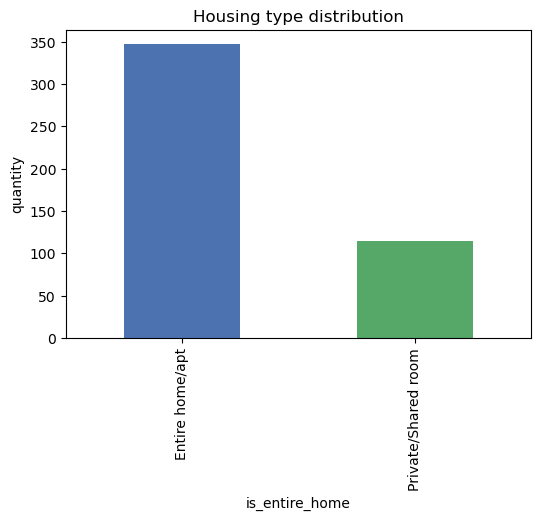

In [43]:
import matplotlib.pyplot as plt

# Statistical quantity
room_counts = df_core["is_entire_home"].value_counts().rename({True: "Entire home/apt", False: "Private/Shared room"})

# Draw a bar chart
fig, ax = plt.subplots(figsize=(6,4))
room_counts.plot(kind="bar", color=["#4C72B0", "#55A868"], ax=ax)
ax.set_title("Housing type distribution")
ax.set_ylabel("quantity")
plt.show()


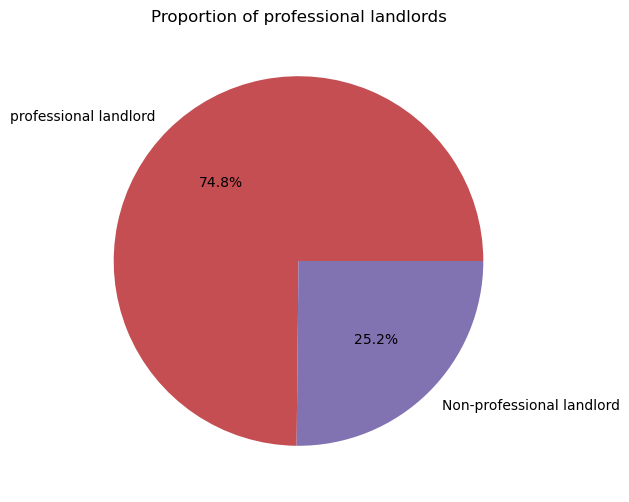

In [44]:
# Statistical proportion
host_counts = df_core["is_multi_host"].value_counts().rename({True: "professional landlord", False: "Non-professional landlord"})

# Draw a pie chart
fig, ax = plt.subplots(figsize=(6,6))
host_counts.plot(kind="pie", autopct="%1.1f%%", colors=["#C44E52", "#8172B2"], ax=ax)
ax.set_ylabel("")
ax.set_title("Proportion of professional landlords")
plt.show()


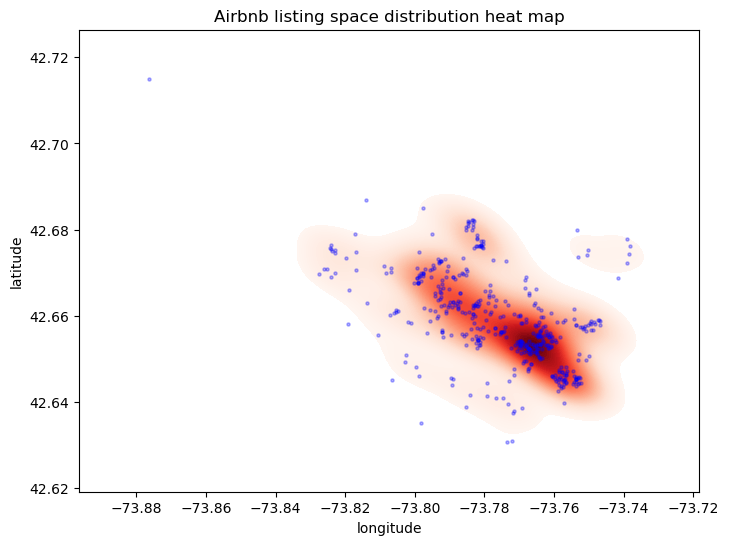

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only listings with non-empty coordinates will be retained.
df_map = df_core[["latitude", "longitude"]].dropna()

plt.figure(figsize=(8,6))

# Use seaborn's kdeplot to plot a two-dimensional heatmap of kernel density estimation.
sns.kdeplot(
    x=df_map["longitude"],
    y=df_map["latitude"],
    cmap="Reds", fill=True, thresh=0.05, levels=100
)

# Add scatter points as a reference (optional)）
plt.scatter(df_map["longitude"], df_map["latitude"], s=5, alpha=0.3, color="blue")

# Set title and axis labels
plt.title("Airbnb listing space distribution heat map")
plt.xlabel("longitude")
plt.ylabel("latitude")

plt.show()


In [1]:
import pandas as pd

calendar = pd.read_csv("project/data/raw/inside_airbnb/calendar.csv.gz", nrows=10)
print(calendar)


            listing_id        date available  price  adjusted_price  \
0  1196288722069341420  2025-09-15         f    NaN             NaN   
1  1196288722069341420  2025-09-16         f    NaN             NaN   
2  1196288722069341420  2025-09-17         f    NaN             NaN   
3  1196288722069341420  2025-09-18         f    NaN             NaN   
4  1196288722069341420  2025-09-19         f    NaN             NaN   
5  1196288722069341420  2025-09-20         f    NaN             NaN   
6  1196288722069341420  2025-09-21         f    NaN             NaN   
7  1196288722069341420  2025-09-22         f    NaN             NaN   
8  1196288722069341420  2025-09-23         f    NaN             NaN   
9  1196288722069341420  2025-09-24         f    NaN             NaN   

   minimum_nights  maximum_nights  
0               1            1125  
1               1            1125  
2               1            1125  
3               1            1125  
4               1            1125  
5 

In [2]:
calendar = pd.read_csv("project/data/raw/inside_airbnb/calendar.csv.gz", nrows=10)
calendar


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1196288722069341420,2025-09-15,f,NaN,NaN,1,1125
1,1196288722069341420,2025-09-16,f,NaN,NaN,1,1125
2,1196288722069341420,2025-09-17,f,NaN,NaN,1,1125
3,1196288722069341420,2025-09-18,f,NaN,NaN,1,1125
4,1196288722069341420,2025-09-19,f,NaN,NaN,1,1125
5,1196288722069341420,2025-09-20,f,NaN,NaN,1,1125
6,1196288722069341420,2025-09-21,f,NaN,NaN,1,1125
7,1196288722069341420,2025-09-22,f,NaN,NaN,1,1125
8,1196288722069341420,2025-09-23,f,NaN,NaN,1,1125
9,1196288722069341420,2025-09-24,f,NaN,NaN,1,1125


In [14]:
availability = calendar.groupby("listing_id")["available"].apply(lambda x: (x=="t").sum())
rented_days = 365 - availability


In [16]:
violation_rate = (rented_days > 90).mean()
print("Percentage of properties with violations:", round(violation_rate, 3))


Percentage of properties with violations: 0.735


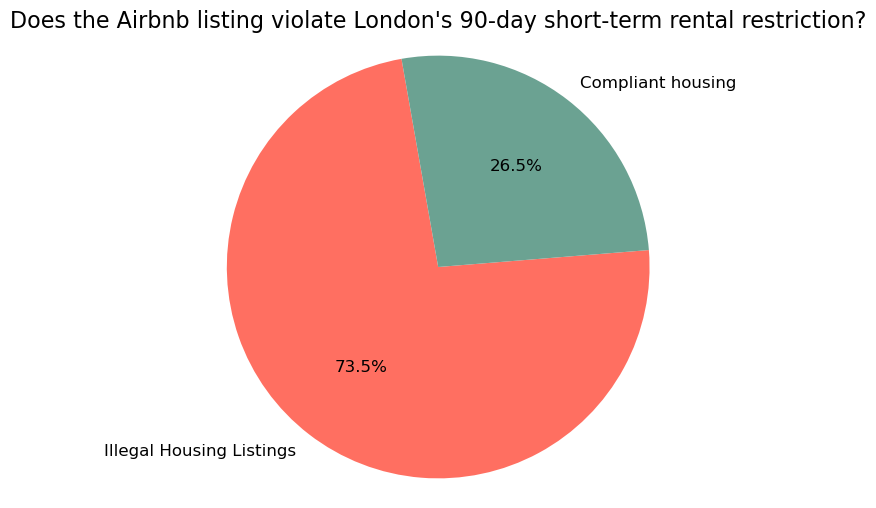

In [24]:
import matplotlib.pyplot as plt

# ratio of violations to compliance
violation_rate = 0.735
compliance_rate = 1 - violation_rate

labels = ['Illegal Housing Listings', 'Compliant housing']
sizes = [violation_rate, compliance_rate]
colors = ['#FF6F61', '#6BA292']

plt.figure(figsize=(6,6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=100,
    colors=colors, textprops={'fontsize': 12}
)
plt.title("Does the Airbnb listing violate London's 90-day short-term rental restriction?", fontsize=16)
plt.axis('equal')
plt.show()
